# Understanding Descriptive Statistics

Import the necessary libraries here:

In [84]:
# Libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [102]:
# your code here

def dice_throwing(n):
    return pd.DataFrame(np.array([random.choice(np.arange(0,7)) for i in range(n)]))

#### 2.- Plot the results sorted by value.

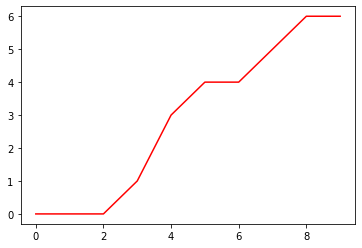

In [103]:
# your code here

dice = dice_throwing(10).sort_values(by = 0).reset_index()[0]

# Plot the results sorted by value (length)

plt.plot(range(len(dice)), dice, color = 'red')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([3., 1., 0., 1., 2., 3.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

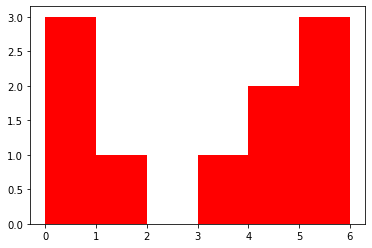

In [104]:
# your code here

plt.hist(dice, bins = 6, range = [0, 6], color = 'red')

In [64]:
"""
What this two plots have in common is that the values for the y axis in the first plot are the same values for the x axis of the second plot
"""

'\nWhat this two plots have in common is that the values for the y axis in the first plot are the same values for the x axis of the second plot\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [95]:
# your code here
# Summing observations - sum, Number of observations (N) - len

def average(n):
    return sum(n)/len(n)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [89]:
# your code here
# 1. Define a frequency distribution function
# 2. Generate the frequency distribution dataset
# 3. Iterate: If the value is in the dataset, 1 is added to the frequency ( for ig, if I weight 50 kilos, an additional 1 would be added to girls who weight 50 kilos )
# 4. If not, no addition takes place

def freq(values):
    freq_dist = {}
    for x in values:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
            
    return freq_dist, sum([k*v for k, v in freq_dist.items()])/sum([v for k, v in freq_dist.items()])

# What do I want to return? Average - Total/Number of data

In [72]:
freq_dist, mean_from_freq = freq(dice)

print(np.mean(dice))

3.4


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [90]:
# your code here

def median(values):
    if len(val) % 2 == 0:
        return sum(val[int(len(val)/2)-1:int(len(val)/2)+1])/2
    else:
        return val[int(len(val)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [91]:
# your code here

def quartiles(values):
    half = median(values)
    
    if len(values) % 2 == 0:
        first_quartile = median(values[:int(len(vals)/2)])
        third_quartile = median(values[int(len(vals)/2):])
        
    else:
        first_quartile = median(values[:int(len(vals)/2)-1])
        third_quartile = median(values[int(len(vals)/2)+1:])
    
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [92]:
# your code here

dice_df = pd.read_csv("roll_the_dice_hundred.csv")

(array([12., 17., 14., 22., 12., 23.]),
 array([0.        , 1.16666667, 2.33333333, 3.5       , 4.66666667,
        5.83333333, 7.        ]),
 <BarContainer object of 6 artists>)

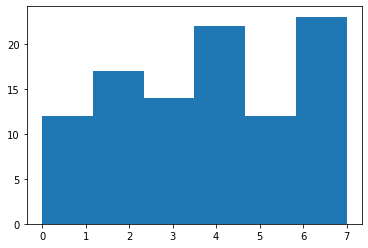

In [93]:
# Sort by values the data

dice_values = sorted(dice_df['value'])
plt.hist(dice_values, bins = 6, range = (0,7))

In [113]:
"""
I don´t really know because the distribution is random
"""

'\nI don´t really know because the distribution is random\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [96]:
# your code here
print(average(dice_values))

3.74


#### 3.- Now, calculate the frequency distribution.


In [105]:
# your code here
freq_dist = freq(dice_values)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

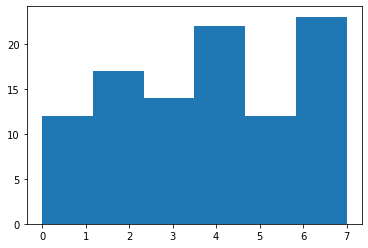

In [107]:
# your code here

plt.hist(dice_values, bins = 6, range = (0, 7))
plt.vlines(dice_df['value'].mean(), ymin = 0, ymax = 20, lw = 2)

# Why does the line not show up?

In [112]:
"""
We can connect the mean value to the histogram by adding it to the plot
"""

'\nWe can connect the mean value to the histogram by adding it to the plot\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175., 167., 175., 168., 149., 166.]),
 array([0.        , 1.16666667, 2.33333333, 3.5       , 4.66666667,
        5.83333333, 7.        ]),
 <BarContainer object of 6 artists>)

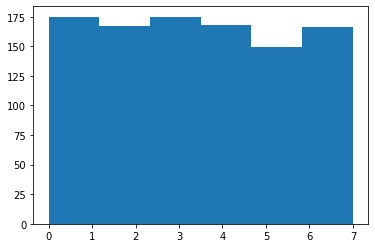

In [110]:
# your code here

roll_thousand = pd.read_csv("roll_the_dice_thousand.csv")
plt.hist(roll_thousand['value'], bins = 6, range = (0, 7))

In [111]:
"""
Yes. The shape is completely different since, in contrast with the other, that was a random distribution, this seems to be much uniform
"""

'\nYes. The shape is completely different since, in contrast with the other, that was a random distribution, this seems to be much uniform\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

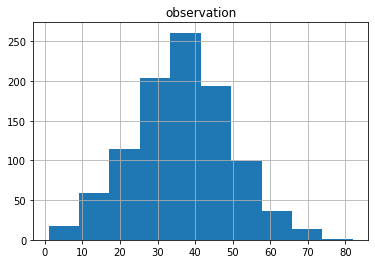

In [114]:
# your code here

ages = pd.read_csv("ages_population.csv")
ages.hist()

In [115]:
# The mean and SD will be in a range between 35 and 40, and the standard deviation value would be around 20

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [118]:
# your code here

print(ages.mean())
print(ages.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
# I was right with MEAN but a bit far from SD

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

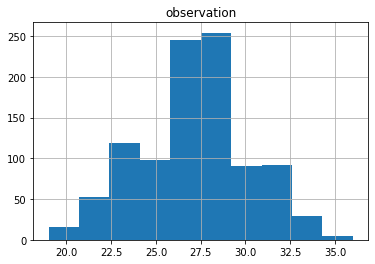

In [125]:
# your code here

ages2 = pd.read_csv("ages_population2.csv")
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [120]:
"""
Yes, there are differences in the data (age range is much shorter), and so the shape of the histogram is different too
"""

'\nYes, there are differences in the data (age range is much shorter), and so the shape of the histogram is different too\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [121]:
# your code here

print(ages2.mean())
print(ages2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [128]:
"""
I think they made sense (maybe they chose only young population, such as students or recentlly undergraduated...) 
"""

'\nI think they made sense (maybe they chose only young population, such as students or recentlly undergraduated...) \n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

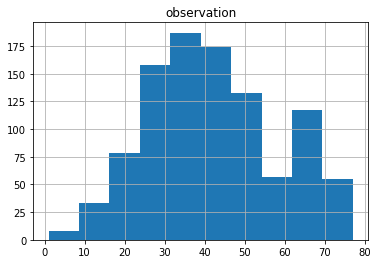

In [126]:
# your code here

ages3 = pd.read_csv("ages_population3.csv")
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [123]:
# your code here

print(ages3.mean())
print(ages3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [127]:
"""
Here distribution is a bit more "irregular" in the sense that it has a second "column" in the right part
"""

'\nHere distribution is a bit more "irregular" in the sense that it has a second "column" in the right part\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [130]:
# your code here

print(ages3.quantile(.25))
print(ages3.quantile(.5))
print(ages3.quantile(.75))

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64


In [131]:
"""
Yes, there is a difference between median and mean (although it is very low)
"""

'\nYes, there is a difference between median and mean (although it is very low)\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [132]:
# your code here

print(ages3.quantile(.3))
print(ages3.quantile(.6))
print(ages3.quantile(.8))

observation    32.0
Name: 0.3, dtype: float64
observation    45.0
Name: 0.6, dtype: float64
observation    57.0
Name: 0.8, dtype: float64


In [ ]:
"""
I think that the first three already gave us plenty of information
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""